# Run the cells below first

In [2]:
import sys
import time
import getpass
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as skm

In [3]:
print(sys.version)

3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]


In [4]:
print(time.asctime())

Tue Nov  5 12:38:42 2019


In [5]:
print(getpass.getuser())

lxu


# Make a matrix of all results(No need to run)

In [5]:
output_directory = '/home/lxu/Desktop/results'

df = pd.DataFrame(0.000,index =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],columns =['walk_length','dimensions','number_walk','window size','p','q','Disease Modifying roc','Clinical Trial roc','Drug Central roc','Symptomatic roc'])

for i, filename in enumerate(os.listdir(output_directory), start=1):
    if 'node2vec_graph' not in filename:
        continue
    directory = os.path.join(output_directory,filename)
    metadata_path= os.path.join(directory,'config.json')
    validation_path = os.path.join(directory,'validation.json')
    df['p'][i]=1
    df['q'][i]=1
    with open(metadata_path, 'r') as file:
        metadata = json.load(file)
        df['walk_length'][i] = metadata['walk_length']
        df['number_walk'][i] = metadata['num_walks']
        df['dimensions'][i] = metadata['dimensions']
        df['window size'][i] = metadata['window']
    with open (validation_path, 'r') as file:
        validation = json.load(file)
        df['Disease Modifying roc'][i] = validation['Disease Modifying']['ROC']
        df['Clinical Trial roc'][i] = validation['Clinical Trial']['ROC']
        df['Drug Central roc'][i] = validation['Drug Central']['ROC']
        df['Symptomatic roc'][i] = validation['Symptomatic']['ROC']

print(df)   

    walk_length  dimensions  number_walk  window size    p    q  \
1          30.0        56.0         10.0         10.0  1.0  1.0   
2          50.0        48.0         10.0         10.0  1.0  1.0   
3          30.0        48.0         10.0          2.0  1.0  1.0   
4          30.0        48.0         10.0          4.0  1.0  1.0   
5          30.0        16.0         10.0         10.0  1.0  1.0   
6          30.0        32.0         10.0         10.0  1.0  1.0   
7          20.0        48.0         10.0         10.0  1.0  1.0   
8          30.0        40.0         10.0         10.0  1.0  1.0   
9          10.0        48.0         10.0         10.0  1.0  1.0   
10         80.0        48.0         10.0         10.0  1.0  1.0   
11         30.0        64.0         10.0         10.0  1.0  1.0   
12         30.0       159.0         10.0         10.0  1.0  1.0   
13         30.0        48.0         10.0         10.0  1.0  1.0   
14          0.0         0.0          0.0          0.0  0.0  0.

In [6]:
dff = pd.read_csv("all_results.tsv", sep='\t')
del dff[dff.columns[0]]
for column in 'walk_length', 'dimensions', 'number_walk', 'window_size':
    dff[column] = dff[column].map(int)
dff.sort_values('walk_length')
dff = dff.sort_values('walk_length')

dff.head()

,walk_length,dimensions,number_walk,window_size,p,q,Disease Modifying,Clinical Trial,Drug Central,Symptomatic
8,10,48,10,10,1.0,1.0,0.500000,0.500000,0.500000,0.500000
6,20,48,10,10,1.0,1.0,0.923265,0.736966,0.826057,0.754967
0,30,56,10,10,1.0,1.0,0.926117,0.696589,0.812160,0.859918
2,30,48,10,2,1.0,1.0,0.938511,0.702795,0.845893,0.872022
3,30,48,10,4,1.0,1.0,0.899846,0.744448,0.721881,0.807746


In [7]:
data = pd.melt(
    dff, 
    id_vars=dff.columns[:6],
    value_vars=dff.columns[6:],
    var_name='dataset',
    value_name='ROC',
)
data.head()

,walk_length,dimensions,number_walk,window_size,p,q,dataset,ROC
0,10,48,10,10,1.0,1.0,Disease Modifying,0.500000
1,20,48,10,10,1.0,1.0,Disease Modifying,0.923265
2,30,56,10,10,1.0,1.0,Disease Modifying,0.926117
3,30,48,10,2,1.0,1.0,Disease Modifying,0.938511
4,30,48,10,4,1.0,1.0,Disease Modifying,0.899846


In [ ]:
sns.pairplot(data[data.columns[:4]])
plt.show()

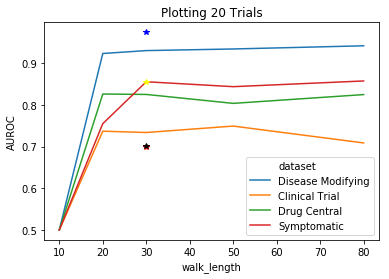

In [28]:
idx = (
    (data.dimensions == 48) 
    & (data.window_size == 10)
    & (data.number_walk == 10)
)

sns.lineplot(
    data=data[idx],
    x='walk_length',
    y='ROC',
    hue='dataset',
   
)

plt.plot([30],[0.974],color='blue',marker="*")
plt.plot([30],[0.7],color='red',marker="*")
plt.plot([30],[0.855],color='yellow',marker="*")
plt.plot([30],[0.702],color='black',marker="*")

plt.title(f'Plotting {idx.sum()} Trials')
plt.ylabel('AUROC')

plt.show()

In [ ]:
data[idx]

In [29]:
for dataset in data.dataset.unique():
    print(dataset, data.iloc[data[data.dataset == dataset]['ROC'].idxmax()], '\n')

Disease Modifying walk_length                   30
dimensions                   159
number_walk                   10
window_size                   10
p                              1
q                              1
dataset        Disease Modifying
ROC                     0.953629
Name: 9, dtype: object 

Clinical Trial walk_length                50
dimensions                 48
number_walk                10
window_size                10
p                           1
q                           1
dataset        Clinical Trial
ROC                  0.749218
Name: 24, dtype: object 

Drug Central walk_length              30
dimensions               48
number_walk              10
window_size               2
p                         1
q                         1
dataset        Drug Central
ROC                0.845893
Name: 29, dtype: object 

Symptomatic walk_length             30
dimensions              48
number_walk             10
window_size              2
p                        1
q 

# Run cells below to generate plots

In [116]:
def read_file(path):
    with open(path,'r') as file:
        validation_dict = json.load(file)
    return validation_dict

In [117]:
all_labels = read_file('labels')
#print(all_labels[1][1])
dm_labels, ct_labels, dc_labels, sy_labels = all_labels[0],all_labels[1],all_labels[2],all_labels[3]

In [118]:
def plot(path_list,evaluation_method):
    dm_roc=[]
    ct_roc=[]
    dc_roc=[]
    sy_roc=[]
    for path in path_list:
        validation_dict=read_file(path)
        dm_roc.append(validation_dict['Disease Modifying']['ROC'])
        ct_roc.append(validation_dict['Clinical Trial']['ROC'])
        dc_roc.append(validation_dict['Drug Central']['ROC'])
        sy_roc.append(validation_dict['Syptomatic']['ROC'])
    # different feature dimensions
    x=['16','32','40','48','56','64']
    #Disease Modifying is training data
    plt.plot(x,dm_roc,color='blue',label='Disease Modifying(training data)')
    plt.plot(x,ct_roc,color='red',label='Clinical Trial')
    plt.plot(x,dc_roc,color='yellow',label='Drug Central')
    plt.plot(x,sy_roc,color='black',label='Syptomatic')
    # Himmelstein's roc, plot as same color with the same dataset.compare them with the best result-dimension 48
    plt.plot(['48'],[0.974],color='blue',marker="*")
    plt.plot(['48'],[0.7],color='red',marker="*")
    plt.plot(['48'],[0.855],color='yellow',marker="*")
    plt.plot(['48'],[0.702],color='black',marker="*")
    plt.xlabel('number of feature dimension')
    plt.ylabel('AUROC')
    plt.title(label='AUROC of different feature dimensions of node2vec')
    plt.legend()

# read validations files to generate AUROC df

In [119]:
def read_repeat (path):
    data =[]
    
   
    for i,name in enumerate(os.listdir(path), start=1):
        file_path = os.path.join(path,name)
        if 'config.json' in name:
            
            metadata = read_file(file_path)
            dimension = metadata['dimensions']
            num_walks = metadata['num_walks']
            repeat = metadata['repeat']
            window = metadata['window']
            p = metadata['p']
            q = metadata['q']
        elif os.path.isdir(file_path) == True:
            for i,name in enumerate(os.listdir(file_path),start=1):
                one_data = []
                if not 'validation' in name:
                    continue
                else:
                    validation_path = os.path.join(file_path,name)
                    validation_data = read_file(validation_path)
                    one_data.append(validation_data['Disease Modifying']['ROC'])
                    one_data.append(validation_data['Clinical Trial']['ROC'])
                    one_data.append(validation_data['Drug Central']['ROC'])
                    one_data.append(validation_data['Symptomatic']['ROC'])
                data.append(one_data)
    df = pd.DataFrame(data=data, columns = ['Disaese Modifying', 'Clinical Trial', 'Drug Central','Symptomatic'])
    #plot = sns.boxplot(x=df.columns,data=df)
    return df


# Read validation files to generate AUPR df

In [129]:
def aupr (validation_data):
    dm_aupr = skm.average_precision_score(dm_labels,np.array(validation_data['Disease Modifying']['Prediction Probability'])
                                          [:,1])
    ct_aupr = skm.average_precision_score(ct_labels,np.array(validation_data['Clinical Trial']['Prediction Probability'])
                                          [:,1])
    dc_aupr = skm.average_precision_score(dc_labels,np.array(validation_data['Drug Central']['Prediction Probability'])
                                          [:,1])
    sy_aupr = skm.average_precision_score(sy_labels,np.array(validation_data['Symptomatic']['Prediction Probability'])
                                          [:,1])
    return dm_aupr, ct_aupr, dc_aupr, sy_aupr

In [130]:
def read_repeat_pl (path):
    data =[]
    
   
    for i,name in enumerate(os.listdir(path), start=1):
        file_path = os.path.join(path,name)
        if 'config.json' in name:
            
            metadata = read_file(file_path)
            dimension = metadata['dimensions']
            num_walks = metadata['num_walks']
            repeat = metadata['repeat']
            window = metadata['window']
            p = metadata['p']
            q = metadata['q']
        elif os.path.isdir(file_path) == True:
            for i,name in enumerate(os.listdir(file_path),start=1):
                one_data = []
                if not 'validation' in name:
                    continue
                else:
                    validation_path = os.path.join(file_path,name)
                    validation_data = read_file(validation_path)
                    dm_aupr, ct_aupr, dc_aupr, sy_aupr = aupr(validation_data)
                    one_data.append(dm_aupr)
                    one_data.append(ct_aupr)
                    one_data.append(dc_aupr)
                    one_data.append(sy_aupr)
                data.append(one_data)
    df = pd.DataFrame(data=data, columns = ['Disaese Modifying', 'Clinical Trial', 'Drug Central','Symptomatic'])
    #plot = sns.boxplot(x=df.columns,data=df)
    return df


# AUROC of node2vec

In [12]:
nw10 = read_repeat('/home/lxu/Desktop/node2vec_graph_nw10')
p1q0_5 = read_repeat('/home/lxu/Desktop/node2vec_graph_p1q0_5')
p1q2 = read_repeat('/home/lxu/Desktop/node2vec_graph_p1q2')
nw50_p1q2 = read_repeat('/home/lxu/Desktop/node2vec_graph_wl50_p1q2')
nw100_p1q2 = read_repeat('/home/lxu/Desktop/node2vec_graph_wl100_p1q2')


nw10.to_csv('nw10_repeat.csv')
p1q0_5.to_csv('p1q0_5_repeat.csv')
p1q2.to_csv('p1q2_repeat.csv')      
nw100_p1q2.to_csv('nw100_p1q2_repeat.csv')      
nw50_p1q2.to_csv('nw50_p1q2_repeat.csv')

# Re-evaluate Disease Modifying

In [ ]:
# To do :
# Re-write pairs.py
# import it and re-evaluate all models

In [10]:
from drugrelink.pairs import train_test_pairs
test_dm, _, _, _, _ = train_test_pairs(validation_path='/home/lxu/Desktop/learn-master/validate/validation-statuses.tsv',
                                      train_path = '/home/lxu/Desktop/learn-master/prediction/features/transformed-features.tsv.bz2',
                                      symptomatic_path = '/home/lxu/Desktop/learn-master/prediction/predictions/probabilities.tsv')

In [11]:
p1q1_wl30 = pd.read_csv('nw10_repeat.csv',index_col=0 )
p1q0_5_wl30 = pd.read_csv('p1q0_5_repeat.csv',index_col=0)
p1q2_wl30 = pd.read_csv('p1q2_repeat.csv',index_col=0)
p1q2_wl50 = pd.read_csv('nw50_p1q2_repeat.csv',index_col=0)
p1q2_wl100 = pd.read_csv('nw100_p1q2_repeat.csv',index_col=0)

In [17]:
from os import listdir
from os.path import isfile, join
import joblib
from drugrelink.embedders import get_embedder
from drugrelink.train import validate
import pickle
def replace_dm (df, models_path):
    replace_list = []
    #file = os.join.path(models_path,)  
    lg_files = [ os.path.join(models_path, f) for f in listdir(models_path) if 'logistic_regression' in f and isfile(os.path.join(models_path, f))]
    wv_files = [ os.path.join(models_path, f) for f in listdir(models_path) if 'word2vec' in f and isfile(os.path.join(models_path, f))]
    lg_files.sort()
    wv_files.sort()
    print(lg_files)
    print(wv_files)
    # sort names of wv models
    for i in range(len(lg_files)):
        lg_model = joblib.load(lg_files[i])
        with open(wv_files[i],'rb') as file:
            wv_model = pickle.load(file)
        array_dm = np.array(test_dm)
        list_dm = array_dm[:,0:2]
        label_dm = array_dm[:,2]
        embedder_function = get_embedder('hadamard')
        vectors_dm = embedder_function(wv_model, list_dm)
        roc, _, _ = validate(lg_model,vectors_dm,label_dm)
        replace_list.append(roc)
    print(replace_list)
    df[['Disease Modifying']] = replace_list
        
    return df


['/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_1.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_2.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_3.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_4.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_5.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_6.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_7.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_8.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/logistic_regression_clf_9.joblib']
['/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30/w

KeyboardInterrupt: 

In [25]:
p1q1_wl30_new = replace_dm(p1q1_wl30, '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30')
p1q0_5_wl30_new = replace_dm(p1q0_5_wl30,'/home/lxu/drugrelink/repeated_models/node2vec/p1q0.5_wl30')
p1q2_wl30_new = replace_dm(p1q2_wl30,'/home/lxu/drugrelink/repeated_models/node2vec/p1q2_nw30')
p1q2_wl50_new = replace_dm(p1q2_wl50,'/home/lxu/drugrelink/repeated_models/node2vec/p1q2_wl50')
p1q2_wl100_new = replace_dm(p1q2_wl100,'/home/lxu/drugrelink/repeated_models/node2vec/p1q2_wl100')




['/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_1.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_2.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_3.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_4.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_5.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_6.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_7.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_8.joblib', '/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/logistic_regression_clf_9.joblib']
['/home/lxu/drugrelink/repeated_models/node2vec/p1q1_wl30/word2vec_model.pickle',

[0.930460935579294, 0.9509329142469695, 0.9485844824859502, 0.9324523647852425, 0.9355013223075944, 0.9288370903125585, 0.9568230147202306, 0.9466567004644975, 0.9486523050274317, 0.9434397817400454]


In [31]:
wl30 = pd.read_csv('nw10_repeat.csv',index_col=0)
wl30

,Disaese Modifying,Clinical Trial,Drug Central,Symptomatic
0,0.932334,0.715545,0.817488,0.889800
1,0.917750,0.701025,0.758899,0.781241
2,0.500000,0.500000,0.500000,0.500000
3,0.935909,0.712806,0.825138,0.837450
4,0.920734,0.722368,0.794240,0.817617
5,0.920730,0.690505,0.777279,0.707269
6,0.912795,0.717028,0.806795,0.824595
7,0.922392,0.699408,0.826327,0.827995
8,0.927109,0.725275,0.792356,0.800122
9,0.924129,0.731944,0.810817,0.851771


In [26]:
p1q1_wl30_new.to_csv('p1q1_wl30_new.csv')
p1q0_5_wl30_new.to_csv('p1q0_5_wl30_new.csv')
p1q2_wl30_new.to_csv('p1q2_wl30_new.csv')
p1q2_wl50_new.to_csv('p1q2_wl50_new.csv')
p1q2_wl100_new.to_csv('p1q2_wl100_new.csv')

In [35]:
p1q1_wl30_new = pd.read_csv('p1q1_wl30_new.csv',index_col=0)
p1q1_wl30_new['Clinical Trial'] = wl30['Clinical Trial'].tolist()
p1q1_wl30_new
p1q1_wl30_new.to_csv('p1q1_wl30_new.csv')

In [42]:
p1q1_wl30_new.rename(columns={'Disaese Modifying':'Training Data'})
p1q0_5_wl30_new.rename(columns={'Disaese Modifying':'Training Data'})
p1q2_wl30_new.rename(columns={'Disaese Modifying':'Training Data'})
p1q2_wl50_new.rename(columns={'Disaese Modifying':'Training Data'})
p1q2_wl100_new.rename(columns={'Disaese Modifying':'Training Data'})


,Training Data,Clinical Trial,Drug Central,Symptomatic,Disease Modifying
0,0.948652,0.708400,0.814491,0.788971,0.930461
1,0.943440,0.701813,0.828543,0.874783,0.950933
2,0.935501,0.676134,0.819853,0.874400,0.948584
3,0.946657,0.700302,0.813700,0.838019,0.932452
4,0.950933,0.702810,0.842467,0.866548,0.935501
5,0.948584,0.699754,0.818917,0.854805,0.928837
6,0.956823,0.714927,0.844998,0.852863,0.956823
7,0.928837,0.723439,0.783933,0.852227,0.946657
8,0.930461,0.714226,0.784787,0.855562,0.948652
9,0.932452,0.716803,0.805213,0.852469,0.943440


In [39]:
p1q1_wl30_new.insert(5,'q',1)
p1q0_5_wl30_new.insert(5,'q',0.5)
p1q2_wl30_new.insert(5,'q',2)


In [58]:
p1q1_wl30_new.rename(columns={'Disaese Modifying':'Training Data'},inplace=True)
p1q1_wl30_new

,Training Data,Clinical Trial,Drug Central,Symptomatic,Disease Modifying,q
0,0.932334,0.715545,0.817488,0.889800,0.927109,1
1,0.917750,0.701025,0.758899,0.781241,0.920734,1
2,0.500000,0.500000,0.500000,0.500000,0.920730,1
3,0.935909,0.712806,0.825138,0.837450,0.924129,1
4,0.920734,0.722368,0.794240,0.817617,0.500000,1
5,0.920730,0.690505,0.777279,0.707269,0.922392,1
6,0.912795,0.717028,0.806795,0.824595,0.912795,1
7,0.922392,0.699408,0.826327,0.827995,0.935909,1
8,0.927109,0.725275,0.792356,0.800122,0.932334,1
9,0.924129,0.731944,0.810817,0.851771,0.917750,1


In [126]:
p1q2_wl100_new

,Disaese Modifying,Clinical Trial,Drug Central,Symptomatic,walk_length,Disease Modifying
0,0.948652,0.708400,0.814491,0.788971,100,0.930461
1,0.943440,0.701813,0.828543,0.874783,100,0.950933
2,0.935501,0.676134,0.819853,0.874400,100,0.948584
3,0.946657,0.700302,0.813700,0.838019,100,0.932452
4,0.950933,0.702810,0.842467,0.866548,100,0.935501
5,0.948584,0.699754,0.818917,0.854805,100,0.928837
6,0.956823,0.714927,0.844998,0.852863,100,0.956823
7,0.928837,0.723439,0.783933,0.852227,100,0.946657
8,0.930461,0.714226,0.784787,0.855562,100,0.948652
9,0.932452,0.716803,0.805213,0.852469,100,0.943440


In [51]:
p1q0_5_wl30_new.rename(columns={'Disaese Modifying':'Training Data'},inplace=True)

In [52]:
p1q2_wl30_new.rename(columns={'Disaese Modifying':'Training Data'},inplace=True)

In [70]:
df_pq = pd.concat([p1q1_wl30_new,p1q0_5_wl30_new,p1q2_wl30_new])
df_pq.drop(columns=['Training Data'],inplace=True)

In [72]:
dff=df_pq.melt(id_vars='q')
dff

,q,variable,value
0,1.0,Clinical Trial,0.715545
1,1.0,Clinical Trial,0.701025
2,1.0,Clinical Trial,0.500000
3,1.0,Clinical Trial,0.712806
4,1.0,Clinical Trial,0.722368
...,...,...,...
115,2.0,Disease Modifying,0.930388
116,2.0,Disease Modifying,0.928002
117,2.0,Disease Modifying,0.926748
118,2.0,Disease Modifying,0.931351


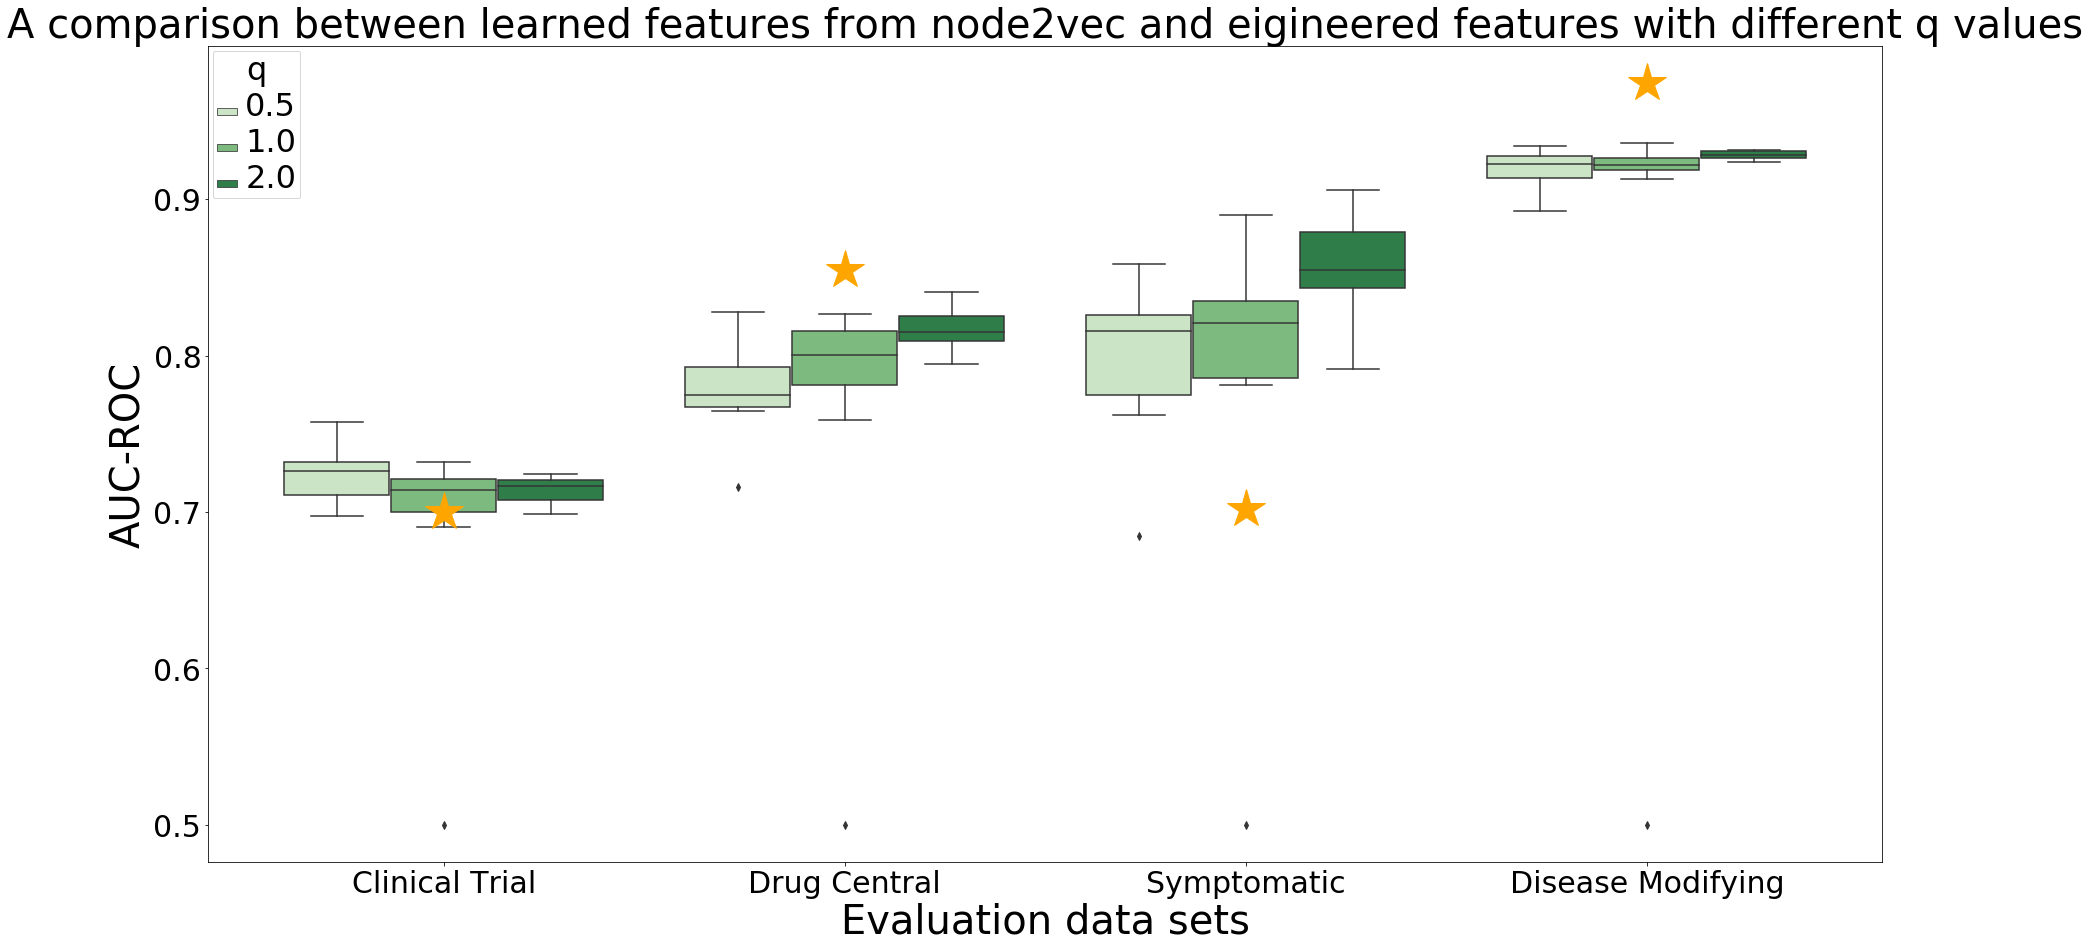

In [102]:
a=plt.figure(figsize=(30,15))
pp = sns.boxplot(x='variable',y='value',hue='q',data=dff,palette = 'Greens')
#plattele =["windows blue", "amber", "greyish", "faded green"]
#sns.color_palette(plattele)
pp.set_title('A comparison between learned features from node2vec and eigineered features with different q values',fontsize=40)
pp.set_ylabel('AUC-ROC',fontsize=40)
pp.set_xlabel('Evaluation data sets',fontsize=40)
#pp.axhline(y=0.974,ls='--',color ='#9b59b6')
#pp.axhline(y=0.7,ls='--',color='#e74c3c')
#pp.axhline(y=0.855,ls='--',color ='#95a5a6')
#pp.axhline(y=0.702,ls='--',color ='#2ecc71')

plt.plot(['Clinical Trial'],[0.7],marker="*",markersize=40,color='orange')
plt.plot(['Drug Central'],[0.855],marker="*",markersize=40,color='orange')
plt.plot(['Symptomatic'],[0.702],marker="*",markersize=40,color='orange')
plt.plot(['Disease Modifying'],[0.974],marker="*",markersize=40,color='orange')
pp.tick_params(labelsize=30)
plt.setp(pp.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(pp.get_legend().get_title(), fontsize='32')
a.savefig('pq.png')

In [83]:
#p1q2_wl30_new.drop(columns=['Training Data','q'])
p1q2_wl30_new.insert(4,'walk_length',30)
p1q2_wl50_new.insert(4,'walk_length',50)
p1q2_wl100_new.insert(4,'walk_length',100)

In [86]:
df_wl = pd.concat([p1q2_wl30_new, p1q2_wl50_new,p1q2_wl100_new])

/home/lxu/anaconda3/envs/my-new-rdkit-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [89]:
df_wl.drop(columns=['Disaese Modifying'],inplace=True)


In [95]:
dff_wl=df_wl.melt(id_vars='walk_length')

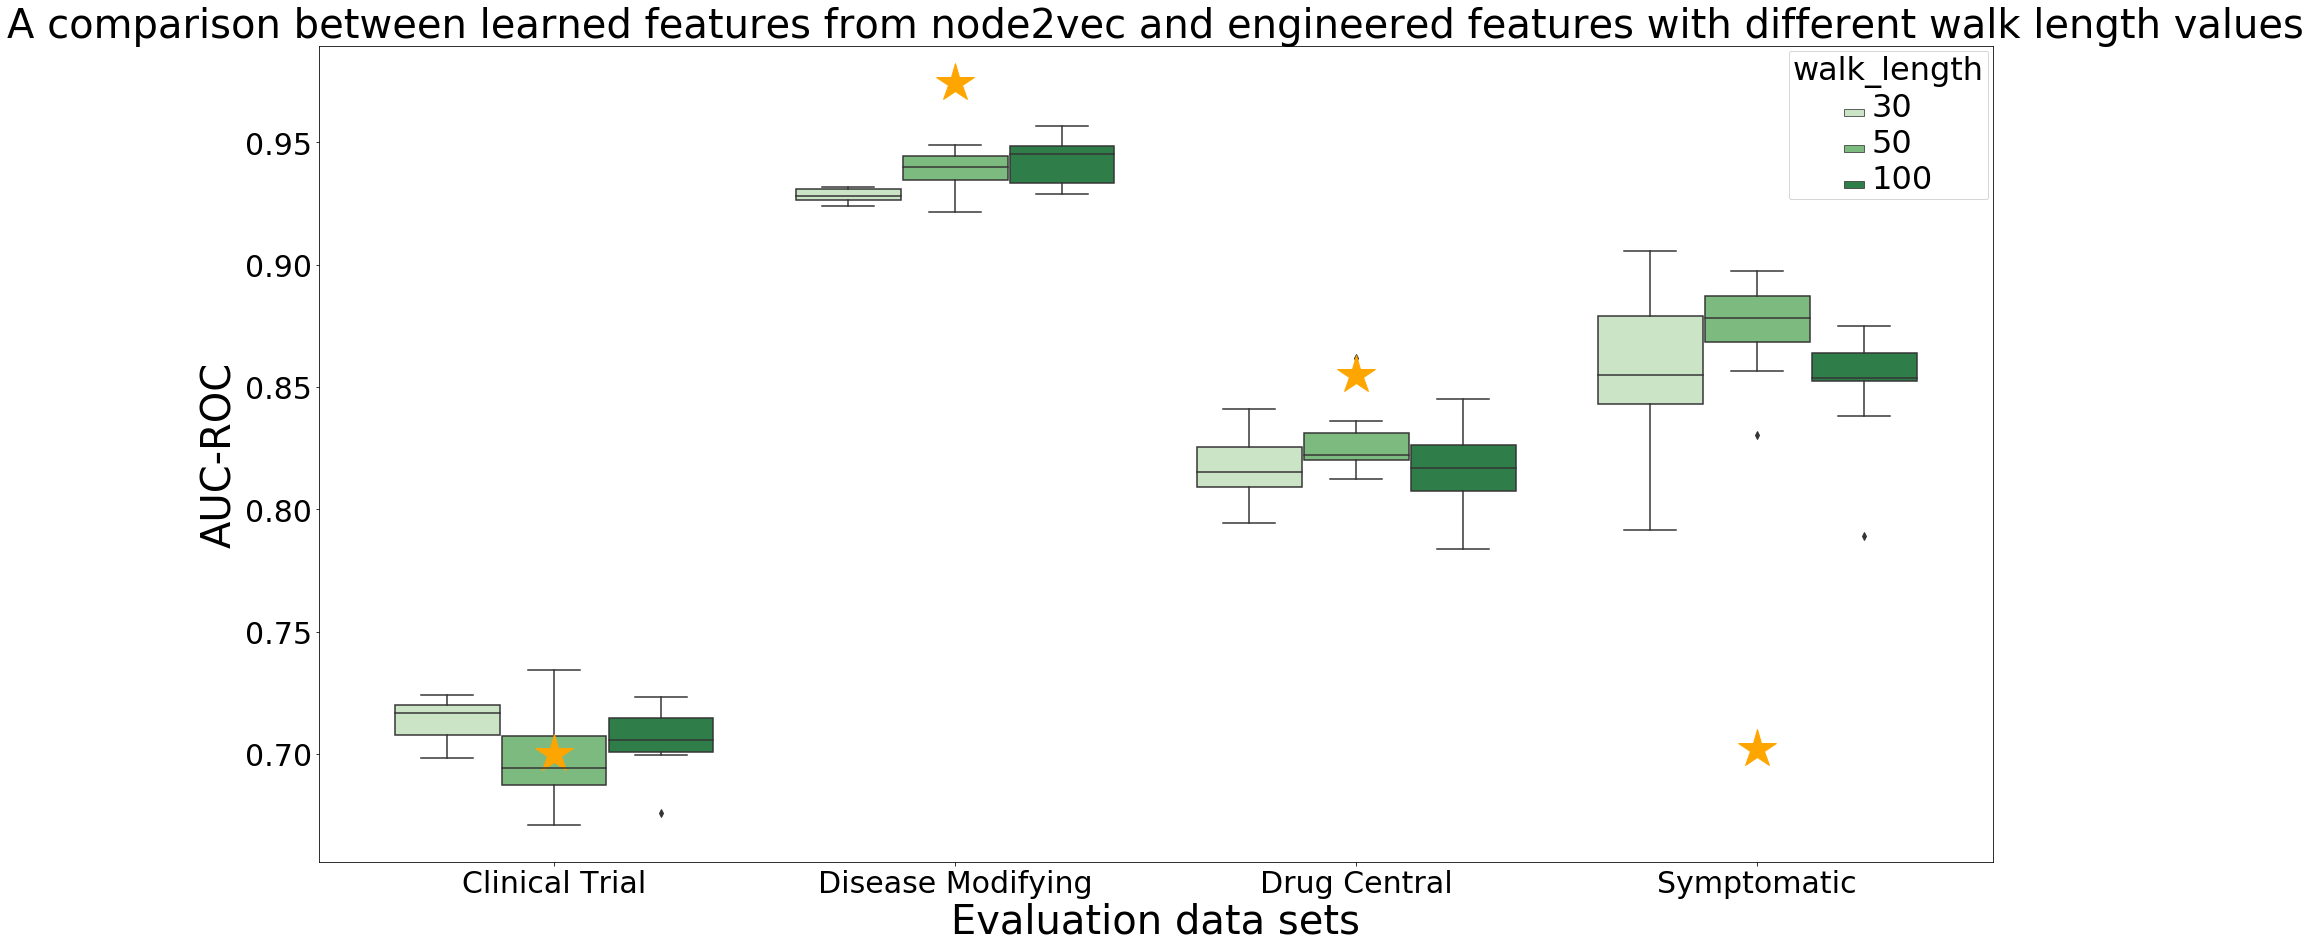

In [104]:
a=plt.figure(figsize=(30,15))
pp = sns.boxplot(x='variable',y='value',hue='walk_length',data=dff_wl,palette='Greens')
#plattele =["windows blue", "amber", "greyish", "faded green"]
#sns.color_palette(plattele)
pp.set_title('A comparison between learned features from node2vec and engineered features with different walk length values',fontsize=40)
pp.set_ylabel('AUC-ROC',fontsize=40)
pp.set_xlabel('Evaluation data sets',fontsize=40)
plt.plot(['Clinical Trial'],[0.7],marker="*",markersize=40,color='orange')
plt.plot(['Disease Modifying'],[0.974],marker="*",markersize=40,color='orange')
plt.plot(['Drug Central'],[0.855],marker="*",markersize=40,color='orange')
plt.plot(['Symptomatic'],[0.702],marker="*",markersize=40,color='orange')

pp.tick_params(labelsize=30)
plt.setp(pp.get_legend().get_texts(), fontsize='32') # for legend text
plt.setp(pp.get_legend().get_title(), fontsize='32')
a.savefig('wl.png')

# AUROC of edge2vec

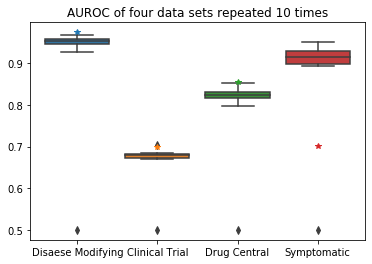

In [120]:
edge2vec_em10 = read_repeat('/home/lxu/Desktop/edge2vec_em10')
edge2vec_em10.to_csv('edge2vec_em10')
pl= sns.boxplot(data=edge2vec_em10)
pl.set_title('AUROC of four data sets repeated 10 times')
plt.plot(['Disease Modifying'],[0.974],marker="*")
plt.plot(['Clinical Trial'],[0.7],marker="*")
plt.plot(['Drug Central'],[0.855],marker="*")
plt.plot(['Symptomatic'],[0.702],marker="*")
# dimensions = 48
# walk_lenght =100
# num_walks =10
# repeat=10
# window =3
# p=1
# q=1
# e_step =1
# em_iteration =10
# max_count =10000

In [121]:
p1q2_df = pd.read_csv('edge2vec_em10',index_col=0)
p1q2_df

,Disaese Modifying,Clinical Trial,Drug Central,Symptomatic
0,0.927677,0.680984,0.797945,0.892114
1,0.956943,0.669894,0.826669,0.951467
2,0.954777,0.702855,0.829167,0.927183
3,0.949341,0.672106,0.844661,0.913320
4,0.953219,0.684430,0.814674,0.928731
5,0.967201,0.680211,0.853322,0.939025
6,0.956846,0.679128,0.819022,0.917076
7,0.943169,0.678001,0.822028,0.895757
8,0.961783,0.683439,0.831850,0.907785
9,0.500000,0.500000,0.500000,0.500000


In [122]:
edge2vec_em10 = replace_dm(p1q2_df,'/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000')

['/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_1.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_2.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_3.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_4.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_5.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_6.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_7.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_8.joblib', '/home/lxu/drugrelink/repeated_models/edge2vec/em10_mc10000/logistic_regression_clf_9.joblib']
['/home/lxu/drugrelink/repeated_models/edge2vec/em1

In [133]:
edge2vec_em10

,Clinical Trial,Drug Central,Symptomatic,Disease Modifying
0,0.680984,0.797945,0.892114,0.961783
1,0.669894,0.826669,0.951467,0.953219
2,0.702855,0.829167,0.927183,0.967201
3,0.672106,0.844661,0.913320,0.500000
4,0.684430,0.814674,0.928731,0.954777
5,0.680211,0.853322,0.939025,0.943169
6,0.679128,0.819022,0.917076,0.956846
7,0.678001,0.822028,0.895757,0.949341
8,0.683439,0.831850,0.907785,0.927677
9,0.500000,0.500000,0.500000,0.956943


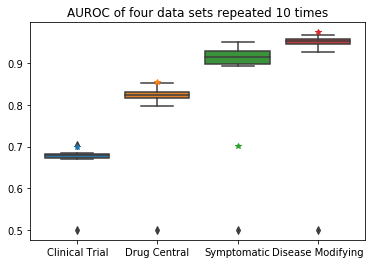

In [123]:
edge2vec_em10.drop(columns=['Disaese Modifying'],inplace=True)
pl= sns.boxplot(data=edge2vec_em10)
pl.set_title('AUROC of four data sets repeated 10 times')

plt.plot(['Clinical Trial'],[0.7],marker="*")
plt.plot(['Drug Central'],[0.855],marker="*")
plt.plot(['Symptomatic'],[0.702],marker="*")
plt.plot(['Disease Modifying'],[0.974],marker="*")
# dimensions = 48

In [20]:
p1q2_df['Symptomatic'].mean()

0.8541499047750761

In [21]:
p1q2_df['Drug Central'].mean()

0.816445081521296

# AUPR of node2vec

In [135]:
p1q2_wl100_pr = read_repeat_pl('/home/lxu/Desktop/node2vec_graph_wl100_p1q2')

p1q2_wl30_pr = read_repeat_pl('/home/lxu/Desktop/node2vec_graph_p1q2')

In [136]:
p1q2_wl100_pr.to_csv('p1q2_wl100_pr.csv')


In [ ]:
from os import listdir
from os.path import isfile, join
import joblib
from drugrelink.embedders import get_embedder
from glmnet.logistic import LogitNet
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import pickle
def replace_dm_pr (df, models_path):
    replace_list = []
    #file = os.join.path(models_path,)  
    lg_files = [ os.path.join(models_path, f) for f in listdir(models_path) if 'logistic_regression' in f and isfile(os.path.join(models_path, f))]
    wv_files = [ os.path.join(models_path, f) for f in listdir(models_path) if 'word2vec' in f and isfile(os.path.join(models_path, f))]
    lg_files.sort()
    wv_files.sort()
    print(lg_files)
    print(wv_files)
    # sort names of wv models
    for i in range(len(lg_files)):
        lg_model = joblib.load(lg_files[i])
        with open(wv_files[i],'rb') as file:
            wv_model = pickle.load(file)
        array_dm = np.array(test_dm)
        list_dm = array_dm[:,0:2]
        label_dm = array_dm[:,2]
        embedder_function = get_embedder('hadamard')
        vectors_dm = embedder_function(wv_model, list_dm)
        y_pro = lg_model.predict_proba(vectors_dm)
        pr = average_precision_score(label_dm, y_pro)
        replace_list.append(pr)
    print(replace_list)
    df[['Disease Modifying']] = replace_list
        
    return df

In [ ]:
p1q2_wl100_pr=replace_dm_pr(p1q2_wl100,)

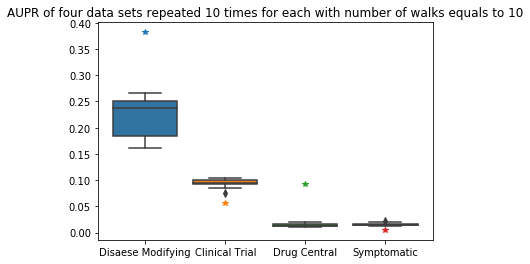

In [134]:
p1 = sns.boxplot(data=p1q2_wl100)
p1.set_title('AUPR of four data sets repeated 10 times for each with number of walks equals to 10')
plt.plot(['Disease Modifying'],[0.382],marker="*")
plt.plot(['Clinical Trial'],[0.056],marker="*")
plt.plot(['Drug Central'],[0.093],marker="*")
plt.plot(['Symptomatic'],[0.005],marker="*")
# dimensions = 48
# walk length = 30
# window = 10
# p = 1
# q = 1
# num_walk = 10

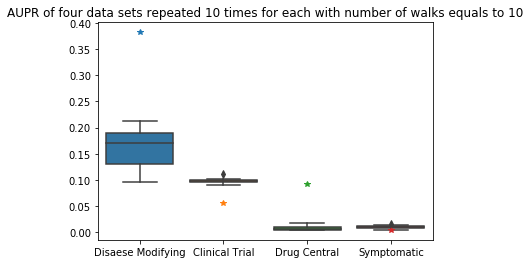

In [33]:
p1 = sns.boxplot(data=p1q0_5)
p1.set_title('AUPR of four data sets repeated 10 times for each with number of walks equals to 10')
plt.plot(['Disease Modifying'],[0.382],marker="*")
plt.plot(['Clinical Trial'],[0.056],marker="*")
plt.plot(['Drug Central'],[0.093],marker="*")
plt.plot(['Symptomatic'],[0.005],marker="*")
# dimensions = 48
# walk length = 30
# window = 10
# p = 1
# q = 0.5
# num_walk = 10

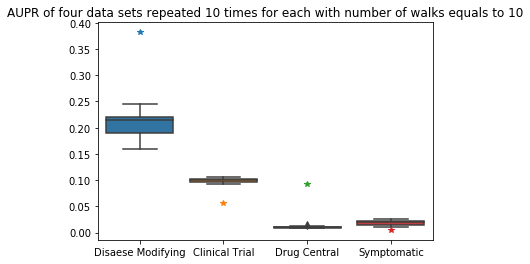

In [34]:
p1 = sns.boxplot(data=p1q2)
p1.set_title('AUPR of four data sets repeated 10 times for each with number of walks equals to 10')
plt.plot(['Disease Modifying'],[0.382],marker="*")
plt.plot(['Clinical Trial'],[0.056],marker="*")
plt.plot(['Drug Central'],[0.093],marker="*")
plt.plot(['Symptomatic'],[0.005],marker="*")
# dimensions = 48
# walk length = 30
# window = 10
# p = 1
# q = 2
# num_walk = 10

# AUPR of edge2vec

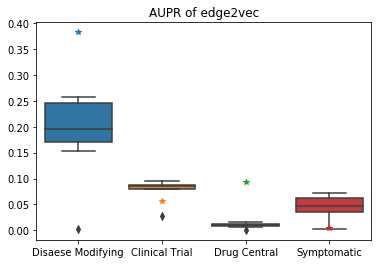

In [18]:
edge2vec_em10 = read_repeat_pl('/home/lxu/Desktop/edge2vec_em10')
pl = sns.boxplot(data=edge2vec_em10)
pl.set_title('AUPR of edge2vec')
plt.plot(['Disease Modifying'],[0.382],marker="*")
plt.plot(['Clinical Trial'],[0.056],marker="*")
plt.plot(['Drug Central'],[0.093],marker="*")
plt.plot(['Symptomatic'],[0.005],marker="*")
# dimensions = 48
# walk_lenght =100
# num_walks =10
# repeat=10
# window =3
# p=1
# q=1
# e_step =1
# em_iteration =10
# max_count =10000